# Immersed Interface Method
---

### Author: Marin Lauber

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import NSsolver as ns
try:
    plt.style.use("jupyter")
except OSerror:
    print("Using default ploting style")

The Immersed Interface Method (IIM) was initially developed for elliptical equation of the form

\begin{equation}
    \nabla\cdot(\beta(x)\nabla u(x)) + \kappa(x) u(x) = f(x)
\end{equation}

in a bounded domain $\Omega$, where $u$, $\beta$, $\kappa$ are potentially discontinuous across the interface located at $\alpha$. This type of problem is especially relevant for bi-material problem, such as multiphase flow, and even fluid-structure interaction, where an interface is immersed onto a fluid. The codimension of the interface located at $\alpha$ is one, that is it has one dimension less than the domain $\Omega$.

## 1 Dimensional Problem

Broadly, IIM aims at writing a finite difference approximation of a 1D version of (1)

\begin{equation}
    (\beta u_x)_x + \kappa u = f
\end{equation}

as

\begin{equation}
    \gamma_{i,1}u_{i-1} + \gamma_{i,2}u_{i} + \gamma_{i,3}u_{i+1} + \kappa_i u_i = f_i + C_i
\end{equation}

where $\gamma_{i,k}$ are coefficient that ensure global $O(h^2)$ accuracy of the numerical discretization. The term $C_i$ is a correction term that accounts for the jump in the variables at $\alpha$. If the point $\alpha$ falls in between two grid points, say $x_{j} < \alpha < x_{j+1}$, then $\forall i\neq j, j+1$ the $\gamma_{j,k}$ take the standard form

\begin{split}
    \gamma_{j,1} &=  \frac{\beta_{j-1/2}}{h^2}\\
    \gamma_{j,2} &= \frac{-(\beta_{j-1/2}+\beta_{j+1/2})}{h^2}\\
    \gamma_{j,3} &=\frac{\beta_{j+1/2}}{h^2}\\
    C_i &= 0.
\end{split}

The local truncation error of this scheme is

\begin{equation}
    T_i = \gamma_{i,1}u(x_{i-1}) + \gamma_{i,2}u(x_{i}) + \gamma_{i,3}u(x_{i+1}) + \kappa_i u(x_i) - f_i = O(h^2)
\end{equation}


To derive formula of the type (2) valid at $i = j, j+1$ we only need local $O(h)$ accuracy as only two grid points are involved. Because the underlying function is not smooth, we cannot Taylor expand across the interface, we must do it from each side of it. Taylor expanding for te three neighbouring grid points of the interface that is located such that $x_{j} < \alpha < x_{j+1}$ gives

\begin{split}
    &u_{j-i} = u^- + (x_{j-1} - \alpha)u^-_x + \frac{1}{2}(x_{j-1} - \alpha)^2u^-_{xx} +O(h^3) \\
    &u_{j} = u^- + (x_{j} - \alpha)u^-_x + \frac{1}{2}(x_{j} - \alpha)^2u^-_{xx} +O(h^3)\\
    &u_{j+i} = u^+ + (x_{j+1} - \alpha)u^+_x + \frac{1}{2}(x_{j+1} - \alpha)^2u^+_{xx} +O(h^3)\\
\end{split}

where 

\begin{equation}
    u^- = \lim_{x\to \alpha^-}u(x) \qquad\qquad  u^+ = \lim_{x\to \alpha^+}u(x).
\end{equation}

We also need $O(h)$ approximation to the remaining terms in (...), thos are obtained as

\begin{equation}
    k_ju_{j} = k(\alpha) u^-(\alpha) = O(h) \qquad\qquad f_j = f(\alpha) = O(h).
\end{equation}

From the known jump conditions in $u$ and $\beta u_x$ we can get relationship between $u^-$ and $u^+$, and so on

\begin{equation}
    u^+ = u^- +\hat{C} \qquad\qquad u_x^+ = (\beta^-u^-_x +C)/\beta^+.
\end{equation}

Since we assumed that $f$ is continuous, $(\beta u_x)_x + \kappa u$ must also be. This gives us an expression for $u_{xx}^+$

\begin{equation}
    u_{xx}^+ = \frac{1}{\beta^+}\left(\beta^-u_{xx}^- + \left(\beta_x^- - \frac{\beta_x^+\beta^-}{\beta^+}\right)u_x^- - \frac{\beta_x^+}{\beta^+}C- \kappa\hat{C}\right).
\end{equation}

Finally we can get an approximation for $f(\alpha)$ from

\begin{equation}
    \beta_x^-u_x^- + \beta^-u_xx^- + \kappa(\alpha)u^-  = f(\alpha).
\end{equation}

Substituting all those expressions into our truncation error expression gives four relationshpis for a local $O(h)$ approximation of the equation near the discontinuity

\begin{split}
    &\gamma_{j,1} + \gamma_{j,2} + \gamma_{j,3} = 0,\\
    &(x_{j-1}- \alpha)\gamma_{j,1} + (x_{j}- \alpha)\gamma_{j,2} + \left\{\frac{\beta^-}{\beta^+}(x_{j+1}-\alpha) + \left(\frac{\beta_x^-}{\beta^+} - \frac{\beta_x^+\beta^-}{(\beta^+)^2}\right)\frac{(x_{j+1}-\alpha)^2}{2}\right\}\gamma_{j,3} = \beta_x^+,\\
    &\frac{(x_{j-1}-\alpha)^2}{2}\gamma_{j,1} + \frac{(x_{j}-\alpha)^2}{2}\gamma_{j,2} + \frac{(x_{j+1}-\alpha)^2\beta^-}{2\beta^+}\gamma_{j,3} = \beta^-,\\
    &C_j = \gamma_{j,3}\left\{\hat{C} + (x_{j+1}-\alpha)\frac{C}{\beta^+} - \frac{1}{2}(x_{j+1}-\alpha)^2\left(\frac{\beta_x^+C}{(\beta^+)^2}-\kappa\frac{\hat{C}}{\beta^+}\right)\right\}.\\
\end{split}

In the context of an immersed structural interface (a membrane) these sets of coefficients are much simpler to obtain. Because $\beta$ is continuous across the interface (in this case beta is the density). We also have $\kappa=0$ and as such only relationship (1) is kept. The two following ones disapear and the last relatinship become

\begin{equation}
    C_j = \frac{1}{h^2}(x_{j+1}-\alpha)C + \frac{\beta}{h^2}\hat{C}
\end{equation}

which is discretized verion of

\begin{equation}
    \beta u''(x) = f(x) + C\delta(x-\alpha) + \hat{C}\delta'(x-\alpha).
\end{equation}

For your 1D piston example, the pressure gradient must be 

\begin{equation}
    p_x = cst. = V
\end{equation}

such that the jump in $\beta p_x = C = 0$. This leaves us with simply

\begin{equation}
C_j = \hat{C}\beta\delta_h'(x-\alpha)
\end{equation}.

where $\hat{C}$ is the pressure jump at the interface. The algorithm that is solved using Chorin's projection method is

\begin{split}
    u^* = r_{\Delta t}(u_0) \\
    \nabla\cdot(\frac{\Delta t}{\rho}\nabla p) = \nabla\cdot u^* + \hat{C}\beta\delta_h'(x-\alpha)\\
    u^{n+1} = u^* - \frac{\Delta t}{\rho}\nabla p + \Delta t\hat{C}\beta\delta_h(x-\alpha)
\end{split}

In [3]:
def update(C_h, x, u, V, X, dx, dt, t):

    # predict velocity 
    u_star = u + dt*ns.r(u, dx)
    
    # get pressure
    sigma = ns.div(u_star, dx) + C_h*ns.div(ns.kernel((x-X)/dx), dx)
    p = ns.solve_pressure(np.ones_like(sigma), sigma, dx, True)
    
    # correct
    u_n = u_star - dt*ns.grad(p, dx) + dt*C_h*ns.kernel((x-X)/dx)
    
    return sigma, p, u_n

In [4]:
N = 32
x, dx = np.linspace(-1, 1, N, retstep=True)
xs = x +0.5*dx
X = 0.234
V = 1
u0 = np.zeros_like(x)
dt = 1.

# pressure jump is mass of fluid in pipe, in 'cell' units
ch = N*V/dt

print('Pressure jump is: %.3f' % ch)
sigma, p, u_n =  update(ch, x, u0, V, X, dx, 1, 1)
print("Interface at X: %.2f" % X)
print(r"L inf: %.3e" % np.max(np.abs(u_n -  V)))

Pressure jump is: 32.000
Jacobi solver:
	res0: 7.781e+00
 	res: 7.627e-10
 	iter: 32
Interface at X: 0.23
L inf: 2.004e-09


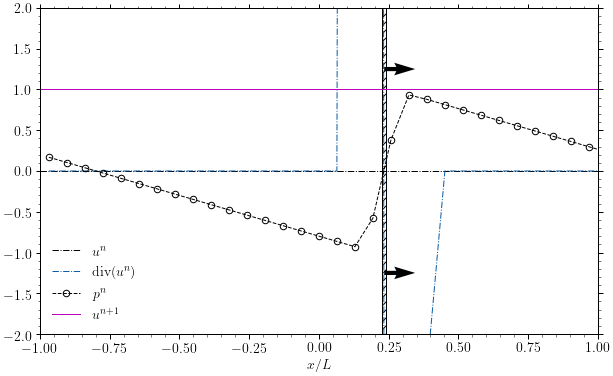

In [5]:
ns.draw_results(x, xs, X, u0, u_n, p, sigma)

This recovers the exact solution, but we have to pass it the corrct pressure jump, which usually would be the what we are trying to solve for.

## IIM-Feedback Forcing

Because this jump in the pressure that is supplied to the equation is usually not known a priori, other immersed inetrface methods have been developped. _AN IMMERSED INTERFACE METHOD FOR INCOMPRESSIBLE NAVIER–STOKES EQUATIONS_

Here the idea is to use a Peskin type forcing to impose the boundary condition, but instead of being applied to the momentum equation, the tangential and normal component are split and the former is applied to the momentum equation while the latter is applied to the pressure Poisson equation

\begin{split}
    u^* = r_{\Delta t}(u_0) + F_1 \\
    \nabla\cdot(\frac{\Delta t}{\rho}\nabla p) = \nabla\cdot u^* + \nabla\cdot F_2\\
    u^{n+1} = u^* - \frac{\Delta t}{\rho}\nabla p + F_2
\end{split}


\begin{split}
    F1 = F_\tau\\
    F2 = F_n
\end{split}

\begin{equation}
    f_n(s,t ) = [p](s,t )
\end{equation}

\begin{equation}
F(x, t) = \int_{s_0}^{s_1}f(s, t)\delta(x - X(s, t))\text{ d}s
\end{equation}

\begin{equation}
 f(s, t) = \kappa\left[\xi(s, t) - \chi(s, t)\right]+ \eta\left[W(s, t) - U(s, t)\right]
\end{equation}



 \begin{equation}
 \nabla\cdot(\frac{\Delta t}{\rho}\nabla p) = \nabla\cdot u^* + C_{ij}
 \end{equation}
 
 \begin{equation}
 C_{ij} = (\nabla\cdot B)_{ij} = \frac{B^1_{i+1/2,j} - B^1_{i-1/2,j}}{\Delta x} + \frac{B^2_{i,j+1/2} - B^2_{i,j-1/2}}{\Delta y}
 \end{equation}
 
 \begin{equation}
 B^1_{i-1/2,j} = \frac{[p]_{i-1/2,j}}{\Delta x}
 \end{equation}

In [22]:
def kernel(d, e=2):
    return np.where(abs(d)<e, 0.5*(1+np.cos(np.pi*d/e))/e, 0)

In [37]:
def update(x, u, V, X, dx, dt, t, eta=10):

    # predict velocity 
    u_star = u + dt*ns.r(u, dx)
    
    # get pressure
    d = (x-X)/dx
    F2 = kernel(d)*eta*(kernel(d)*u - V)
    sigma = ns.div(u_star, dx) + ns.div(F2, dx)
    p = ns.solve_pressure(np.ones_like(sigma), sigma, dx, True)
    
    # correct
    u_n = u_star - dt*ns.grad(p, dx) + dt*F2
    
    return F2, p, u_n

In [38]:
N = 32
x, dx = np.linspace(-1, 1, N, retstep=True)
xs = x +0.5*dx
X = 0.234
V = 1
u0 = np.zeros_like(x)
dt = 1.

sigma, p, u_n =  update(x, u0, V, X, dx, 1, 1, 1)
print("Interface at X: %.2f" % X)
print(r"L inf: %.3e" % np.max(np.abs(u_n -  V)))

Jacobi solver:
	res0: 2.431e-01
 	res: 2.383e-11
 	iter: 32
Interface at X: 0.23
L inf: 1.031e+00


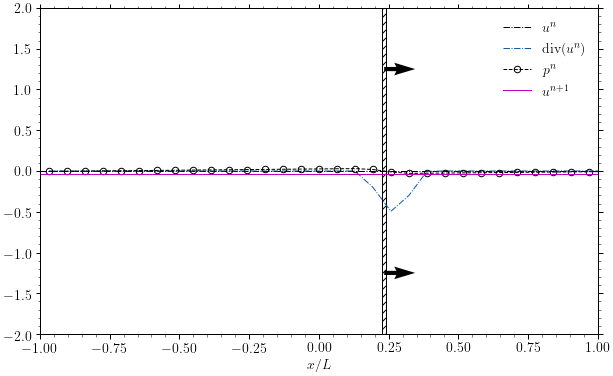

In [39]:
ns.draw_results(x, xs, X, u0, u_n, p, sigma)